# TP03 : Régression logistique

## Régression linéaire polynomiale 
Dans cette partie, comme expliqué en cours nous voyons un exemple simple d'un modèle linéaire sous forme d'un polynome multiple. 



In [179]:
from sklearn.linear_model import LinearRegression  
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import numpy as np
import random

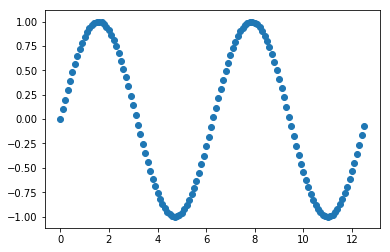

In [180]:
#X = [i for i in range(10)]
#Y = [random.gauss(x,0.75) for x in X]

X=np.arange(0,4*np.pi,0.1)
Y=np.sin(X)
X = np.asarray(X)
Y = np.asarray(Y)

X = X[:,np.newaxis]
Y = Y[:,np.newaxis]

plt.scatter(X,Y)

In [181]:
degree = 7 #degrès du polynome résultant. 

polynomial_features = PolynomialFeatures(degree = degree)
X_TRANSF = polynomial_features.fit_transform(X)
model = LinearRegression()
model.fit(X_TRANSF, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [182]:
Y_NEW = model.predict(X_TRANSF)

rmse = np.sqrt(mean_squared_error(Y,Y_NEW))
r2 = r2_score(Y,Y_NEW)

print('RMSE: ', rmse)
print('R2: ', r2)

RMSE:  0.03881896156407961
R2:  0.9969781168447436


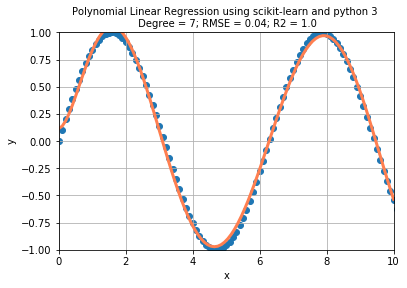

In [183]:
x_new_min = 0.0
x_new_max = 10.0

X_NEW = np.linspace(x_new_min, x_new_max, 100)
X_NEW = X_NEW[:,np.newaxis]

X_NEW_TRANSF = polynomial_features.fit_transform(X_NEW)

Y_NEW = model.predict(X_NEW_TRANSF)

plt.plot(X_NEW, Y_NEW, color='coral', linewidth=3)

plt.grid()
plt.xlim(x_new_min,x_new_max)
plt.ylim(-1,1)

title = 'Degree = {}; RMSE = {}; R2 = {}'.format(degree, round(rmse,2), round(r2,2))

plt.title("Polynomial Linear Regression using scikit-learn and python 3 \n " + title,
          fontsize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X,Y)
plt.show()

## Régression logistique 

La régression logistique est généralement utilisée à des fins de classification. Contrairement à la régression linéaire, la variable à prédire ne peut prendre qu'un nombre limité de valeurs (valeurs discrètes). 

Lorsque le nombre de résultats possibles est seulement deux, on parle de régression logistique binaire.

![](img/logistic.JPG) 

Dans la figure ci-dessus on comprend que la régression logistique est composée d'une régression linéaire suivie de l'application d'une certaine fonction. Cette fonction est la fonction sigmoid dont voici le graphe : 

![](img/sigmoid.JPG) 


## 1 - Préparation des données : 
Les données consistent en un ensemble de notes des etudiants et la valeur à prédire est si l'etudiant est admis(1) ou pas(0) 

In [184]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [185]:
header = ["Note1", "Note2", "Admis"]
notes = pd.read_csv('datasets/marks.txt', names=header)

In [186]:
X = notes.iloc[:, :-1].values
y = notes.iloc[:, -1].values
X_sv=X
X.shape
y.shape

(100,)

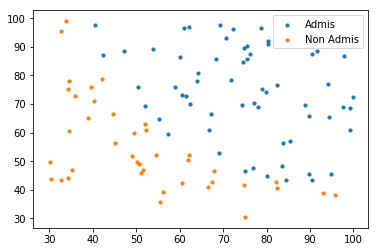

In [187]:
admis = notes.loc[y == 1]
non_admis = notes.loc[y == 0]

plt.scatter(admis.iloc[:, 0], admis.iloc[:, 1], s=10, label='Admis')
plt.scatter(non_admis.iloc[:, 0], non_admis.iloc[:, 1], s=10, label='Non Admis')
plt.legend()
plt.show()

## 2- Régression logistique 

**Expressions mathématiques :  **:
<img src="img/Math.PNG" alt="Drawing" style="width: 300px;"/>
<img src="img/cost.PNG" alt="Drawing" style="width: 300px;"/>
<img src="img/total.PNG" alt="Drawing" style="width: 300px;"/>
<img src="img/deriv.PNG" alt="Drawing" style="width: 300px;"/>

In [188]:
# TODO : Calculer le sigmoid de la valeur x 
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Test : 
sigmoid(5)

0.9933071490757153

In [189]:
# TODO : La fonction de coût utilisée dans la régression logistique 
def J(x,y,theta):
    h=sigmoid(np.dot(x,theta))
    a= y * np.log(h)  + (1 - y) * np.log(1 - h) 
    return -np.sum(a)/x.shape[0] 

In [190]:
# TODO : Programmer la fonction d'entrainement du modèle 
def train(x,y, theta ): 
    m = x.shape[0]
    for i in range(300):
        cout = J(x,y, theta)
        h= sigmoid(np.dot(x, theta))
        grad = (1 / m) * np.dot(x.T, h - y)
        theta = theta -  grad
    return theta 

# TODO : fonction de normalisation des données X 
def normalisation(X):
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    a = (X - mean)/std
    return a,mean,std

# TODO : Entrainer le modèle en choisissant les bons hyperparamètres. 
X,mean,std  = normalisation(X)
X = np.append(np.ones((X.shape[0],1)),X,axis=1)
y=y.reshape(X.shape[0],1)
theta = np.zeros((X.shape[1],1))
print(theta)
theta = train(X,y, theta)
print(theta)


[[0.]
 [0.]
 [0.]]
[[1.60914669]
 [3.76003484]
 [3.49995159]]


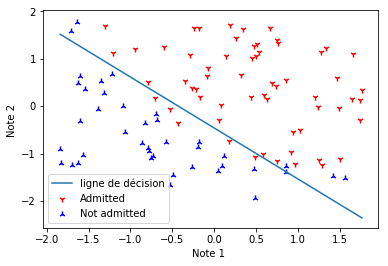

In [191]:
x_values = np.array([np.min(X[:,1]),np.max(X[:,1])])
y_values = (- (theta[0] + np.dot(theta[1], x_values[0])) / theta[2],  - (theta[0] + np.dot(theta[1], x_values[1])) / theta[2])

pos , neg = (y==1).reshape(100,1) , (y==0).reshape(100,1)
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="1",label="Admitted")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="2",label="Not admitted")

plt.plot(x_values, y_values, label='ligne de décision')
plt.xlabel('Note 1 ')
plt.ylabel('Note 2 ')
plt.legend()
plt.show()

In [192]:
# TODO : donner la fonction de prédiction qui retourne la probabilité que X est dans chaque classe 
def predict(x):
    proba=sigmoid(sigmoid(np.dot(x,theta)))
    return proba 

x=np.arange(60).reshape(20,3)

#x1=(x - mean)/std
for i in range(20):
    x[i][2]=1
print(x)

aa=predict(x)
print(aa)

[[ 0  1  1]
 [ 3  4  1]
 [ 6  7  1]
 [ 9 10  1]
 [12 13  1]
 [15 16  1]
 [18 19  1]
 [21 22  1]
 [24 25  1]
 [27 28  1]
 [30 31  1]
 [33 34  1]
 [36 37  1]
 [39 40  1]
 [42 43  1]
 [45 46  1]
 [48 49  1]
 [51 52  1]
 [54 55  1]
 [57 58  1]]
[[0.73092041]
 [0.73105858]
 [0.73105858]
 [0.73105858]
 [0.73105858]
 [0.73105858]
 [0.73105858]
 [0.73105858]
 [0.73105858]
 [0.73105858]
 [0.73105858]
 [0.73105858]
 [0.73105858]
 [0.73105858]
 [0.73105858]
 [0.73105858]
 [0.73105858]
 [0.73105858]
 [0.73105858]
 [0.73105858]]


## 3- Implementation sous sklearn : 

In [193]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split

# TODO : Diviser les données en données d'entrainement et données de tests (Fait dans le TP02 )
## Décider de la taille des données pour chaque set
print(X.shape,Y.shape)
X_train, X_test, y_train, y_test =train_test_split(X_sv, y, test_size=0.2, random_state=0) 

# Créer le modèle 
model = LogisticRegression()

# Entraîner le modèle 
model.fit(X_train, y_train)

# Prédire les classes 
predicted_classes = model.predict(X_test)




(100, 3) (126, 1)


C:\Users\Ryad\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ryad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
